In [1]:
import numpy as np

import matplotlib.pyplot as plt

import itertools

# Task #8

In [13]:
def find_zero(func, x0, x1, step = 1e-3, eps = 1e-6, iters = -1):
    left = x0
    right = x0 + step
    # find zero
    while right + step < x1 and func(left) * func(right) > 0:
        left, right = right, right + step
    
    # check wether we really have found a zero
    if func(left) * func(right) > 0:
        return None
    middle = (left + right) / 2
    i = 0
    while np.abs(right - left) > eps and (iters < 0 or i < iters):
        if func(left) * func(middle) < 0:
            right = middle
        else:
            left = middle
        middle = (left + right) / 2
        i += 1
    return middle
        

def find_all_zeros(func, x0, x1, step = 1e-3, eps = 1e-6, iters = -1, nmax = -1):
    res = []
    n = 1
    while True:
        try:
            zero = find_zero(func, x0, x1, step, eps, iters)
        except:
            zero = None
        
        if zero is None:
            break
        print('#%d zero found' % n)
        res.append(zero)
        n += 1
        if nmax > 0 and n >= nmax:
            break
        x0 = zero + step
    return res


In [14]:
m = 1.790476689362e-27# kg
ħ = 1.0545718e-34
a = 6.5926e-11 # m
test = False
# γ = 2*m/ħ**2
γ = 32.60196635131638
# γ = 10.37752819865529

In [15]:
def lj_potential(x):
    if test:
        return x**2/4
    return 4*(np.power(x*1.0, -12) - np.power(x*1.0, -6))

def get_bounds(En):
    if test:
        return -2*np.sqrt(En), 2*np.sqrt(En)
    dx = np.sqrt(1+En)
    x0 = np.power(0.5*(1 + dx), -1/6) + 1e-5
    x1 = np.power(0.5*(1 - dx), -1/6)
    return x0, x1


def run_ψ(E, grid):
    def next_k2(x):
        return γ**2 * (E - lj_potential(x))
    
    k2 = [next_k2(grid[0]), next_k2(grid[1])]
    ψ = [0, 1]
    
    for i, x in enumerate(grid[2:]):    
        k2.append(next_k2(x))
        
        a = 1 + 1/12 * step**2 * k2[-1]
        b = 2*(1 - 5/12 * step**2 * k2[-2])
        c = 1 + 1/12 * step**2 * k2[-3]
        
        ψ.append(b/a * ψ[-1] - c/a * ψ[-2])
    return np.array(ψ)

def find_xm(E, grid):
    xm, xn = get_bounds(E)
    return (xm + xn) / 2.0

#     v_prev = None
#     for i, v in enumerate(ψ):
#         if v_prev is not None and v < v_prev:
#             return x0 + (i-1)*step
#         v_prev = v
#     return (x0+xn)/2

def func(E):
    xm = find_xm(E, np.arange(x0, xn, step))
    
    grid1 = np.arange(x0, xm, step)
    grid2 = np.arange(xn, xm - 3*step, -step)
    
    ψ1 = run_ψ(E, grid1)
    ψ2 = run_ψ(E, grid2)
    
#     ψ2 = ψ2 * ψ1[-1]/ψ2[-2]
    if (ψ2[-2] > ψ1[-1]):
        ψ2 = ψ2 * ψ1[-1]/ψ2[-2]
    else:
        ψ1 = ψ1 * ψ2[-2]/ψ1[-1]
    
    f = ψ2[-1] - ψ1[-2]
    return f

In [16]:
dE = 1e-4
E0 = -1 + dE
E1 = 0

x0 = 0.7
xn = 5.0
step = (xn - x0) / 1000

zeros = find_all_zeros(func, E0, E1, dE, 1e-6, 100, 50)

#1 zero found
#2 zero found
#3 zero found
#4 zero found
#5 zero found
#6 zero found
#7 zero found
#8 zero found
#9 zero found
#10 zero found
#11 zero found
#12 zero found
#13 zero found
#14 zero found
#15 zero found
#16 zero found
#17 zero found
#18 zero found


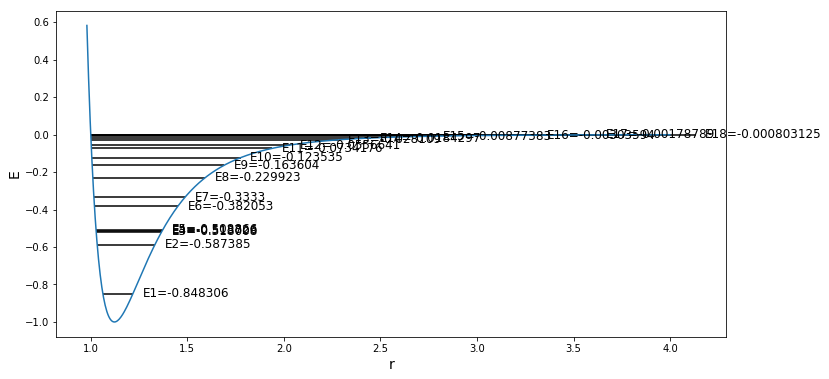

In [17]:
x = np.arange(0.98, 4, step)
y = lj_potential(x)
r0 = np.power(2, 1/6)

plt.figure(figsize=(12, 6))
plt.plot(x, y)

# plt.vlines(r0, -1, 0, colors='c', linestyle='--')
# plt.text(r0 + 0.01, 0.03, 'r0={:g}'.format(r0), fontsize=12, horizontalalignment='left')

for i, zero in enumerate(zeros):
    x0, x1 = get_bounds(zero)
    plt.hlines(zero, x0, x1)
    plt.text(x1 + 0.05, zero, 'E{:d}={:g}'.format(i + 1, zero), fontsize=12, verticalalignment='center')
    
plt.xlabel('r', fontsize=14)
plt.ylabel('E', fontsize=14)

plt.show()

In [109]:
test = True
γ = 1
dE = 1e-2
E0 = 0
E1 = 10

x0 = -6
xn = 6.0
step = (xn - x0) / 500

zeros = find_all_zeros(func, E0, E1, dE, 1e-6, iters=300, nmax=10)

#1 zero found
#2 zero found
#3 zero found
#4 zero found
#5 zero found
#6 zero found
#7 zero found
#8 zero found
#9 zero found


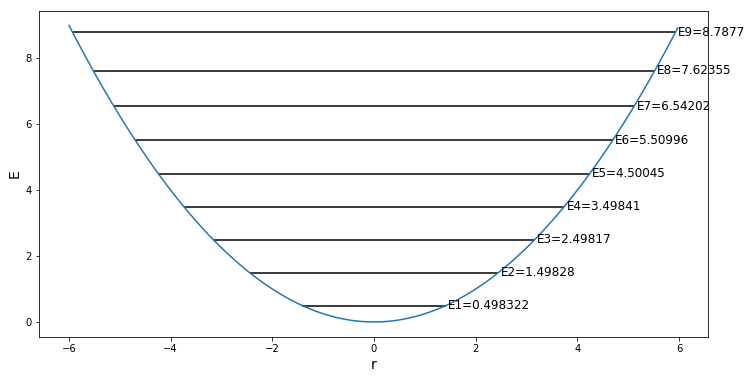

In [111]:
x = np.arange(-6, 6, step)
y = lj_potential(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y)

for i, zero in enumerate(zeros):
    x0, x1 = get_bounds(zero)
    plt.hlines(zero, x0, x1)
    plt.text(x1 + 0.05, zero, 'E{:d}={:g}'.format(i + 1, zero), fontsize=12, verticalalignment='center')
    
plt.xlabel('r', fontsize=14)
plt.ylabel('E', fontsize=14)

plt.show()